### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量：一致文字条件，和不一致文字条件
因变量：每位参与者必须全部完成并记录每种条件下使用的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

我们将对样本均值进行假设检验，由于样本量比较小(<30)，而且基本处于正态分布(可通过数据可视化看出），所以我们采用t test方法。另外，由于不确定在一致文字条件下和不一致文字条件下参与者平均所用时间或多还是或少（分别用β1和β2代表），所以决定采用双尾t test检验方法, α=0.05。首先，
零假设：每位参与者必须全部完成并记录每种条件下使用的时间不会因为不同文字条件而产生改变
H0: β1 - β2 =0 
Ha: β1 ≠ β2 

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [7]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('./stroopdata.csv')
df.mean() - df.median()

Congruent     -0.305375
Incongruent    0.998417
dtype: float64

In [14]:
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

通过比较不同文字条件所花时间的平均值和中位数可以看出，一致文字条件下，几乎相同，所以几乎处于正态分布；而不一致文字条件下，平均值稍大，数据分布微向左偏。
通过比较双方的标准平方差发现，不一致文字条件的值更大，说明数据更分散，可能是由于存在异常值造成了这样的结果。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

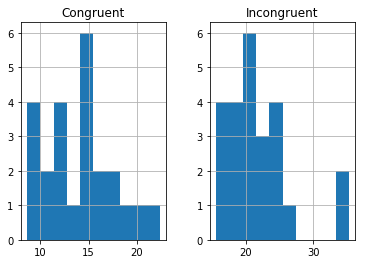

In [23]:
df.hist();

从数据可视化可以看出，一致文字条件下，数据所以几乎处于正态分布；不一致文字条件下，除去最右侧的异常值，数据也几乎处于正态分布

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [27]:
#样本数量
n = len(df)
n

24

In [45]:
#t-critical value for a 95% 置信区间 and n-1=23
from scipy.stats import t
t.ppf(.95, 23)

1.7138715277470473

In [48]:
#t-statistic value
from scipy import stats
stats.ttest_1samp(df['Congruent'] - df['Incongruent'], 0)

Ttest_1sampResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

由于t-statistic value -8.02 < -1.71(t-critical value for a 95% 置信区间)，所以要拒绝零假设。可以说，有95%的把握认为，每位参与者使用的时间会因为不同文字条件而产生改变，即Stroop任务成立，与期望一致。